# Analysis of EPPI-Reviewer benchmarking

In [1]:
# imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_excel('eppiresults.xlsx')
df.columns = ["Run " + str(int(x*0.5)) for x in range(2,22)]

In [3]:
# Take all even columns
minidf = df.iloc[:,0::2]

In [4]:
df10 = minidf[0:618]

C:\Users\alber\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0,0.5,'Inclusions found')

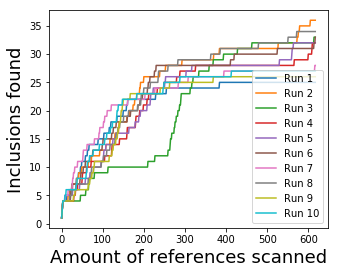

In [5]:
ax = df10.plot(x=df10.index, y = df10.columns, figsize=(5,4))

ax.set_xlabel("Amount of references scanned", fontsize = 18)
ax.set_ylabel("Inclusions found", fontsize = 18)

In [6]:
minidf.iloc[2123,0]

37

In [7]:
# Add a single datapoint of when WSS@95 / WSS@100 is achieved to list per run
data100 = []
data95  = []
for run in range(10):
    data95.append(minidf[minidf.iloc[:,run] == 37].index[0])
    data100.append(minidf[minidf.iloc[:,run] == 38].index[0])

In [8]:
# Turn them into np arrays
data95 = np.array(data95)
data100 = np.array(data100)

# Further analysis

In [9]:
# Analyse the 95 data
print("Mean 95: ", data95.mean())
print("Std  95: ", data95.std())

Mean 95:  806.3
Std  95:  170.18404743100925


In [10]:
# Analyse the 100 data
print("Mean 100: ", data100.mean())
print("Std  100: ", data100.std())

Mean 100:  2062.7
Std  100:  180.86130044871402


In [11]:
# Get last row of 10's data
ar10 = np.array(df10.iloc[-1])

In [12]:
# Analyse the ar10 data
print("Mean 10: ", ar10.mean())
print("Std  10: ", ar10.std())
print("Min  10: ", np.min(ar10))
print("Max  10: ", np.max(ar10))

Mean 10:  30.6
Std  10:  3.5832945734337835
Min  10:  25
Max  10:  36


# (Presentation) Plots and ASR analysis

### Plots that were used in the presentation were slightly different than the ones that were ultimately included in the thesis. I have commented out the RRF@10% plots that were used in the presentation.

In [13]:
# DF + column names
asrdf = pd.read_csv("asrdf.csv")
asrdf.head()

,Run 1,Run 2,Run 3,Run 4,Run 5,Run 6,Run 7,Run 8,Run 9,Run 10
0,5,5,5,5,5,5,5,5,5,5
1,5,5,5,5,5,7,7,5,5,6
2,6,5,6,5,6,7,8,5,5,6
3,6,7,6,5,6,7,8,5,5,6
4,7,7,6,6,6,7,9,6,7,6


C:\Users\alber\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


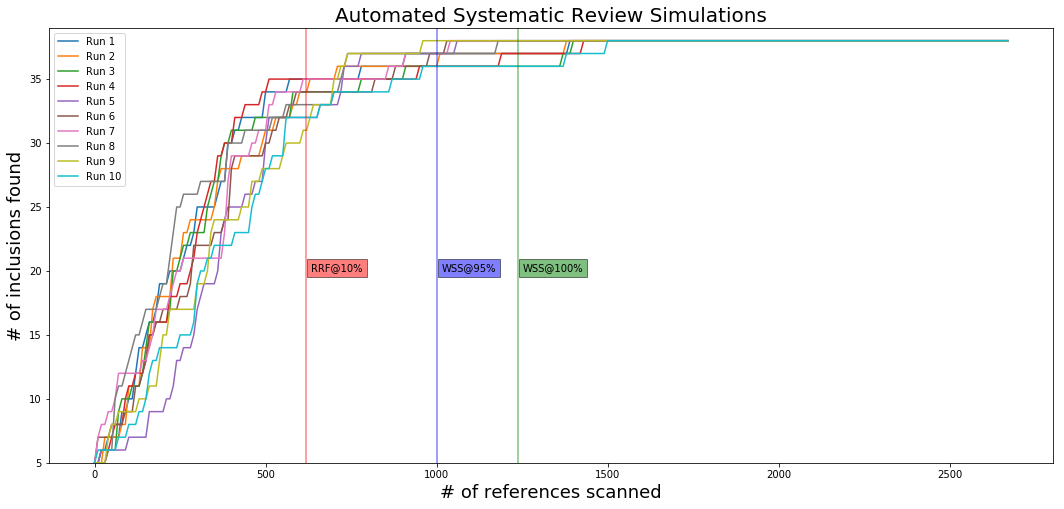

In [14]:
# Do the proper plotting
# WS@95
ax = asrdf.plot(x=asrdf.index * 10, y = asrdf.columns, figsize=(18,8))
ax.set_ylim(5,39)
ax.set_title("Automated Systematic Review Simulations", fontsize = 20)

# Draw vertical lines
ax.axvline(x=618, color = "red", alpha = 0.5)
ax.axvline(x=1000, color = "blue", alpha = 0.5)
ax.axvline(x=1237, color = "green", alpha = 0.5)

# Add textboxes
ax.text(633, 20, "RRF@10%", bbox=dict(facecolor='red', alpha=0.5))
ax.text(1015, 20, "WSS@95%", bbox=dict(facecolor='blue', alpha=0.5))
ax.text(1252, 20, "WSS@100%", bbox=dict(facecolor='green', alpha=0.5))

ax.set_xlabel("# of references scanned", fontsize = 18)
ax.set_ylabel("# of inclusions found", fontsize = 18)

# Output plot to png image
fig = ax.get_figure()
fig.savefig("asrsim.png", bbox_inches='tight')

In [15]:
# RRF@10% plot used for presentation
#asr10 = asrdf.iloc[0:62, :]
#ax = asr10.plot(x=asr10.index * 10, y = asr10.columns, figsize=(15,8))
#ax.set_ylim(5,39)

#ax.set_xlabel("Amount of references scanned", fontsize = 18)
#ax.set_ylabel("Inclusions found", fontsize = 18)

C:\Users\alber\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


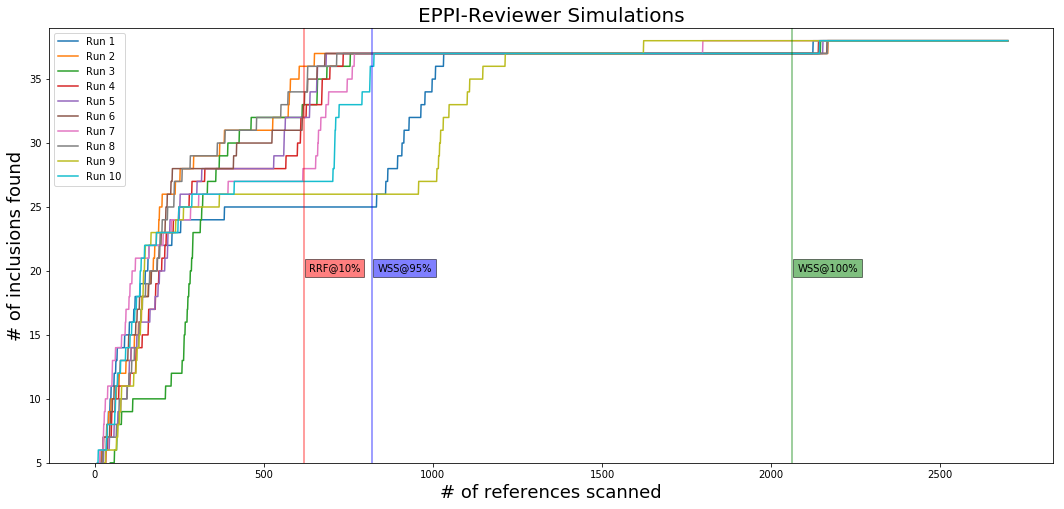

In [16]:
# EPPI WS95
eppi95 = minidf.iloc[0:2700,:]
ax = eppi95.plot(x=eppi95.index, y = eppi95.columns, figsize=(18,8))
ax.set_ylim(5,39)
ax.set_title("EPPI-Reviewer Simulations", fontsize = 20)

# Draw vertical lines
ax.axvline(x=618, color = "red", alpha = 0.5)
ax.axvline(x=821, color = "blue", alpha = 0.5)
ax.axvline(x=2062, color = "green", alpha = 0.5)

# Add textboxes
ax.text(633, 20, "RRF@10%", bbox=dict(facecolor='red', alpha=0.5))
ax.text(836, 20, "WSS@95%", bbox=dict(facecolor='blue', alpha=0.5))
ax.text(2077, 20, "WSS@100%", bbox=dict(facecolor='green', alpha=0.5))

ax.set_xlabel("# of references scanned", fontsize = 18)
ax.set_ylabel("# of inclusions found", fontsize = 18)

# Output plot to png image
fig = ax.get_figure()
fig.savefig("eppisim.png", bbox_inches='tight')

In [17]:
# Plot used for presentation
# EPPI RRF@10
#ax = df10.plot(x=df10.index, y = df10.columns, figsize=(15,8))
#ax.set_ylim(5,39)

#ax.set_xlabel("Amount of references scanned", fontsize = 18)
#ax.set_ylabel("Inclusions found", fontsize = 18)

# Analysis of ASR 10 data

In [18]:
asr10 = asrdf.iloc[0:62, :]

In [19]:
asr10.tail(1)

,Run 1,Run 2,Run 3,Run 4,Run 5,Run 6,Run 7,Run 8,Run 9,Run 10
61,35,34,34,35,32,34,35,33,31,32


In [20]:
asr10.iloc[61,:].mean()

33.5

In [21]:
asr10.iloc[61,:].median()

34.0

In [22]:
asr10.iloc[61,:].std()

1.4337208778404378

In [23]:
df10.iloc[617,:].mean()

30.6

In [24]:
df10.iloc[617,:].std()

3.777124126457412

In [25]:
asr10.iloc[61,:].min()

31

# Analysis of ASR WSS@95/100%

In [26]:
# Function to return right data for 37 or 38 inclusions
def wss(df, num):
    # Instantiate list and append all indices for 37 or 38 inclusions (WSS@95 and WSS@100 respectively)
    data = []
    for run in range(10):
        data.append(df[df.iloc[:,run] == num].index[0])
    
    # Make np array and do values *10 (values were logged every 10 timesteps for asr data)
    data = np.array(data)
    data *= 10
    
    # Return the list
    return data

In [27]:
# Analysis for WSS@95% data by ASR
data95 = wss(asrdf, 37)

In [28]:
# Print all stats for data95
print("Mean: ", data95.mean())
print("Std : ", data95.std())
print("Min : ", data95.min())
print("Max : ", data95.max())

Mean:  1001.0
Std :  227.52802025245154
Min :  740
Max :  1380


In [29]:
# Analysis for WSS@100% data by ASR
data100 = wss(asrdf, 38)

In [30]:
# Print all stats for data95
print("Mean: ", data100.mean())
print("Std : ", data100.std())
print("Min : ", data100.min())
print("Max : ", data100.max())

Mean:  1237.0
Std :  192.30444612644814
Min :  960
Max :  1500
